# Análisis de datos de encuesta 


## Objetivos
### General
Determinar las funcionalidades prioritarias, caracterizar los perfiles de usuario (público objetivo) y establecer los requisitos de usabilidad para justificar el desarrollo de un Sistema de Alerta Temprana para la permanencia estudiantil.


### Específicos

 Segmentar al personal encuestado en grupos con características y necesidades distintas, basándose en la combinación de sus niveles de comodidad digital, experiencia, métodos de documentación actuales y preferencias de herramientas. 

 Detectar patrones de comportamiento o actitudes que correlacionen con el rol principal o los años de experiencia, para comprender cómo estos factores influyen en la percepción del problema y la disposición a la solución.

 Determinar qué variables (ej. rol, años de experiencia, número de estudiantes en riesgo detectados, comodidad digital) influyen significativamente en la percepción de dificultad para identificar estudiantes en riesgo. 

 Analizar las interacciones entre las preferencias de notificaciones y las preocupaciones expresadas

 Establecer si existen asociaciones fuertes entre los tipos de datos que el personal considera más importantes para identificar el riesgo y las acciones de registro o reportes que desean en el sistema. (Por ejemplo, ¿quienes valoran la "asistencia" también priorizan los "reportes de absentismo"?).


**Preparacion del entorno**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re 


def print_list(elements):
    """
    Imprime una lista de elementos con su índice.
    Útil para revisar nombres de columnas o categorías.
    """
    for i, element in enumerate(elements):
        print(f"{i}-{element}")


def extract_numeric_from_likert(text):
    """
    Extrae el valor numérico de cadenas que representan escalas Likert
    (e.g., "3 (Moderadamente difícil)"). 
    Retorna NaN si el texto es nulo, vacío o contiene "No aplica" (caso especial).
    """
    if pd.isna(text) or (isinstance(text, str) and "No aplica" in str(text)):
        return np.nan
    

    match = re.search(r'(\d)', str(text))
    if match:
        return int(match.group(1))
    return np.nan 


sns.set_style("whitegrid")

**Listamos los directorios en la carpeta**

In [24]:
import os 

directories = os.listdir()
for directory in directories:
    print(directory)
    

notebook_analisis.ipynb
encuestas
.venv
ejemplos de notebooks
notebook_elbueno.ipynb


**Listar los archivos disponibles en la carpeta de encuestas**

In [25]:
folder  = "encuestas"
directories = os.listdir(os.path.join(folder))
for directory in directories:
    print(directory)

Encuesta 9no.csv


**Seleccionamos el archivo de interés**

In [26]:
file = directories[0]
path = os.path.join(folder, file)

In [27]:
import pandas as pd
respuestas = pd.read_csv(path)
respuestas.head()

,Marca temporal,¿Cuál es su rol principal en la institución?,¿A qué área o departamento pertenece principalmente?,¿Cuántos años de experiencia tiene trabajando en institutos académicos?,"Actualmente, ¿cómo identifica a los estudiantes que podrían estar en riesgo de no continuar sus estudios?","En una semana típica, ¿aproximadamente cuántos estudiantes presentan signos de rezago o problemas que ponen en riesgo su desempeño?",¿Qué tan difícil considera el proceso actual de identificar tempranamente a los estudiantes en riesgo?\n1 (Nada difícil)\n2 (Poco difícil)\n3 (Moderadamente difícil)\n4 (Algo difícil)\n5 (Muy difícil)\n,¿Qué tipos de datos sobre los estudiantes considera más importantes para identificar su riesgo?\n(Seleccione 3),¿Cómo se documenta actualmente las intervenciones o apoyos que brinda a un estudiante en riesgo?,¿Qué tan fácil es coordinar la información y las acciones sobre un estudiante en riesgo con sus compañeros de trabajo?\n1 (Muy fácil)\n2 (Fácil)\n3 (Neutro/Regular)\n4 (Difícil)\n5 (Muy difícil)\n,¿Qué tan cómodo/a se siente utilizando herramientas digitales en su trabajo diario?\n1 (Muy incómodo/a)\n2 (Incómodo/a)\n3 (Neutro/Regular)\n4 (Cómodo/a)\n5 (Muy cómodo/a)\n,¿Qué dispositivos utiliza principalmente para trabajar en el centro o institución?,"¿Cuál es su nivel de experiencia o familiaridad con sistemas o aplicaciones digitales diseñadas para seguir el rendimiento, comportamiento o progreso académico de los estudiantes (ej. sistema de gestión académica oficial, plataformas educativas, herramientas de seguimiento individual)?\n1 (Nula experiencia)\n2 (Poca experiencia)\n3 (Moderada experiencia)\n4 (Bastante experiencia)\n5 (Mucha experiencia)\n",¿Cuál ha sido su experiencia con ellas?\n1 (Muy Negativa)\n2 (Negativa)\n3 (Neutro)\n4 (Positiva)\n5 (Muy Positiva)\nNo aplica (Si no ha usado ninguna herramienta de este tipo)\n,¿Cómo preferiría notificar una alerta urgente sobre un estudiante en riesgo?,"Considerando un sistema que identifique automáticamente estudiantes en riesgo basándose en sus datos de comportamiento (asistencia, notas, etc.), ¿qué tan útil cree que sería para reducir el rezago y la deserción?\n1 (Nada útil)\n2 (Poco útil)\n3 (Moderadamente útil)\n4 (Bastante útil)\n5 (Muy útil)\n","¿Qué tan importante es para usted que el sistema NO solo le diga QUIÉN está en riesgo, sino también LE EXPLIQUE POR QUÉ está en riesgo (ej. bajo rendimiento en X asignatura, alta inasistencia, incidentes)? \n1 (Nada importante)\n2 (Poco importante)\n3 (Moderadamente importante)\n4 (Bastante importante)\n5 (Muy importante)\n",¿Con qué frecuencia le gustaría que el sistema actualizará la información de los estudiantes?,¿Qué acciones considera que son las más importantes de poder registrar en la aplicación para el seguimiento de estudiantes en riesgo? \n(Seleccione 3),¿Qué tipo de reportes generados por el sistema serían más valiosos para usted o su departamento?,¿Cuál de las siguientes considera MAS importante como herramienta para seguimiento el desempeño de un estudiante?\n,¿Qué tan probable sería que recomendará esta herramienta a un colega de otro instituto si estuviera disponible?,¿Qué métricas o indicadores considera USTED que serían más importantes para evaluar si esta herramienta está siendo útil en su trabajo o en el instituto?\n(Seleccione máximo 3),¿Qué aspectos relacionados con el uso de un sistema de alerta temprana para estudiantes en riesgo le generan más preocupación o dudas?\n(Seleccione máximo 3),"¿Con qué frecuencia utiliza herramientas (aplicaciones, software, plantillas, etc.) adicionales a los sistemas de gestión académica oficiales para hacer seguimiento de estudiantes o registrar información relevante?\n1 (Nunca)\n2 (Rara vez)\n3 (A veces)\n4 (Frecuentemente)\n5 (Muy frecuentemente)\n","Si utiliza herramientas adicionales (con la frecuencia que indicó en la pregunta anterior), ¿cuáles de las siguientes herramientas o tipos de herramientas utiliza principalmente para el seguimiento de

In [28]:
cols = respuestas.columns
for col in cols:
    print(col)

Marca temporal
¿Cuál es su rol principal en la institución?
¿A qué área o departamento pertenece principalmente? 
¿Cuántos años de experiencia tiene trabajando en institutos académicos? 
Actualmente, ¿cómo identifica a los estudiantes que podrían estar en riesgo de no continuar sus estudios?
En una semana típica, ¿aproximadamente cuántos estudiantes presentan signos de rezago o problemas que ponen en riesgo su desempeño? 
¿Qué tan difícil considera el proceso actual de identificar tempranamente a los estudiantes en riesgo?
1 (Nada difícil)
2 (Poco difícil)
3 (Moderadamente difícil)
4 (Algo difícil)
5 (Muy difícil)

¿Qué tipos de datos sobre los estudiantes considera más importantes para identificar su riesgo?
(Seleccione 3)
¿Cómo se documenta actualmente las intervenciones o apoyos que brinda a un estudiante en riesgo?
¿Qué tan fácil es coordinar la información y las acciones sobre un estudiante en riesgo con sus compañeros de trabajo?
1 (Muy fácil)
2 (Fácil)
3 (Neutro/Regular)
4 (Difí

In [29]:
mapeo = [
    "marca_temporal",
    "rol_principal",
    "area_departamento",
    "anios_experiencia",
    "metodo_identificacion_riesgo",
    "num_estudiantes_riesgo_semanal",
    "dificultad_identificacion_riesgo",
    "tipos_datos_importantes",
    "documentacion_intervenciones",
    "facilidad_coordinacion",
    "comodidad_herramientas_digitales",
    "dispositivos_principales",
    "experiencia_sistemas_seguimiento",
    "experiencia_con_sistemas",
    "preferencia_notificacion_alerta",
    "utilidad_sistema_automatico",
    "importancia_explicacion_riesgo",
    "frecuencia_actualizacion_sistema",
    "acciones_importantes_registro",
    "tipo_reportes_valiosos",
    "herramienta_mas_importante",
    "probabilidad_recomendar",
    "metricas_importantes",
    "preocupaciones_sistema_alerta",
    "frecuencia_uso_herramientas_adicionales",
    "tipos_herramientas_adicionales",
    "conveniencia_herramientas_adicionales",
    "satisfaccion_herramientas_adicionales"
]

respuestas.columns = mapeo
cols = respuestas.columns
for col in cols:
    print(col)

marca_temporal
rol_principal
area_departamento
anios_experiencia
metodo_identificacion_riesgo
num_estudiantes_riesgo_semanal
dificultad_identificacion_riesgo
tipos_datos_importantes
documentacion_intervenciones
facilidad_coordinacion
comodidad_herramientas_digitales
dispositivos_principales
experiencia_sistemas_seguimiento
experiencia_con_sistemas
preferencia_notificacion_alerta
utilidad_sistema_automatico
importancia_explicacion_riesgo
frecuencia_actualizacion_sistema
acciones_importantes_registro
tipo_reportes_valiosos
herramienta_mas_importante
probabilidad_recomendar
metricas_importantes
preocupaciones_sistema_alerta
frecuencia_uso_herramientas_adicionales
tipos_herramientas_adicionales
conveniencia_herramientas_adicionales
satisfaccion_herramientas_adicionales


In [30]:
features_list = list(cols)
features_list.remove("marca_temporal")
respuestas = respuestas[features_list]
n_respuestas, n_features = respuestas.shape
print(f"Hay {n_respuestas} respuestas para {n_features} preguntas sin considerar la marca temporal")

Hay 27 respuestas para 27 preguntas sin considerar la marca temporal


In [31]:
respuestas.head()

,rol_principal,area_departamento,anios_experiencia,metodo_identificacion_riesgo,num_estudiantes_riesgo_semanal,dificultad_identificacion_riesgo,tipos_datos_importantes,documentacion_intervenciones,facilidad_coordinacion,comodidad_herramientas_digitales,dispositivos_principales,experiencia_sistemas_seguimiento,experiencia_con_sistemas,preferencia_notificacion_alerta,utilidad_sistema_automatico,importancia_explicacion_riesgo,frecuencia_actualizacion_sistema,acciones_importantes_registro,tipo_reportes_valiosos,herramienta_mas_importante,probabilidad_recomendar,metricas_importantes,preocupaciones_sistema_alerta,frecuencia_uso_herramientas_adicionales,tipos_herramientas_adicionales,conveniencia_herramientas_adicionales,satisfaccion_herramientas_adicionales
0,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,3,"Ordenador portátil, dispositivo móvil y televi...",3,3.0,Mensaje SMS,3,4,Semanalmente,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Reducción del número de abandonos escolares.;M...,La privacidad y confidencialidad de los datos ...,3,"Hojas de cálculo (ej. Excel, Google Sheets);Do...",3.0,3
1,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 1 a 3 estudiantes,2,Calificaciones académicas;Historial disciplina...,Registros manuales/cuadernos;Comunicación info...,3,4,Ordenador portátil (Laptop),3,4.0,Correo electrónico,3,4,Semanalmente,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,9,Mejora en la asistencia de los estudiantes ide...,La privacidad y confidencialidad de los datos ...,2,"Documentos de texto (ej. Word, Google Docs);Pl...",3.0,3
2,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,Más de 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos;Documentos digita...,3,4,Teléfono móvil,1,NaN,Correo electrónico,3,4,Quincenalmente,Resumen de la conversación/situación;Acciones ...,Estudiantes con factores de riesgo específicos...,La explicación de por qué un estudiante está e...,4,Facilidad y rapidez en la identificación de es...,La fiabilidad o precisión de la identificación...,1,Ninguno,2.0,3
3,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Conversaciones con el propio estudiante,De 4 a 8 estudiantes,3,Asistencia y absentismo (falta no justificada)...,Registros manuales/cuadernos,3,2,Teléfono móvil,3,4.0,Mensaje SMS,3,4,Quincenalmente,Acciones de apoyo implementadas (ej. tutoría e...,Lista de estudiantes por nivel de riesgo (Alto...,El nivel de riesgo (Alto/Medio/Bajo).,10,Reducción del número de abandonos escolares.;M...,"La resistencia por parte del personal, estudia...",3,"Documentos de texto (ej. Word, Google Docs)",4.0,4
4,Personal de Apoyo (Pedagógico/Administrativo),Docencia,Menos de 3 años,Observación directa en el aula/centro;Análisis...,De 4 a 8 estudiantes,3,Historial disciplinario;Información de evaluac...,Registros manuales/cuadernos;Documentos digita...,4,5,Ordenador portátil (Laptop),4,4.0,Notificación dentro de una aplicación web/móvil,4,4,Semanalmente,Fecha y tipo de contacto con el estudiante/fam...,Lista de estudiantes por nivel de riesgo (Alto...,La explicación de por qué un estudiante está e...,7,Facilidad y rapidez en la identificación de es...,La integración con los sistemas de gestión aca...,4,Bases de datos personales o departamentales (e...,3.0,2


In [32]:
respuestas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rol_principal                            27 non-null     object 
 1   area_departamento                        27 non-null     object 
 2   anios_experiencia                        27 non-null     object 
 3   metodo_identificacion_riesgo             27 non-null     object 
 4   num_estudiantes_riesgo_semanal           27 non-null     object 
 5   dificultad_identificacion_riesgo         27 non-null     int64  
 6   tipos_datos_importantes                  27 non-null     object 
 7   documentacion_intervenciones             27 non-null     object 
 8   facilidad_coordinacion                   27 non-null     int64  
 9   comodidad_herramientas_digitales         27 non-null     int64  
 10  dispositivos_principales                 27 non-null

In [33]:
cols = respuestas.columns
escalas = {}

for col in cols:
    escalas[col] = respuestas[col].unique()
    print(escalas[col])
    

['Personal de Apoyo (Pedagógico/Administrativo)'
 'Profesor/a sin tutoría asignada' 'Tutor/a Academico' 'Profesor'
 'Padre de familia ' 'Personal de Apoyo (Administrativo)'
 'Director/a o Jefe/a de Estudios']
['Docencia' 'Dirección/Gestión']
['Menos de 3 años' 'Más de 10 años' 'De 3 a 10 años']
['Observación directa en el aula/centro;Análisis de calificaciones (historial o recientes);Análisis de asistencia/absentismo;Conversaciones con el propio estudiante;Resultados de pruebas diagnósticas o psicopedagógicas'
 'Observación directa en el aula/centro;Análisis de asistencia/absentismo;Conversaciones con el propio estudiante'
 'Observación directa en el aula/centro;Análisis de calificaciones (historial o recientes);Análisis de asistencia/absentismo;Conversaciones con el propio estudiante'
 'Conversaciones con el propio estudiante'
 'Observación directa en el aula/centro;Análisis de calificaciones (historial o recientes);Informes de otros profesores/tutores'
 'Análisis de asistencia/absent

**Tipos de Datos y Valores Faltantes**

In [34]:
if respuestas is not None:
    print("\n--- Información del dataset (tipos de datos y valores no nulos) ---")
    # df.info() proporciona un resumen conciso: tipo de dato de cada columna,
    # y el conteo de valores no nulos, lo que nos permite identificar NaNs rápidamente.
    respuestas.info()

    print("\n--- Conteo de valores nulos por columna ---")
    # df.isnull().sum() cuenta explícitamente los NaNs en cada columna.
    print(respuestas.isnull().sum())

    # Mostrar las filas con NaNs para comprender el contexto de la falta de datos.
    # Esto es útil para ver si los NaNs corresponden a un patrón (ej., no uso de herramientas adicionales)
    print("\n--- Filas con valores nulos (para entender el contexto de NaNs) ---")
    print(respuestas[respuestas.isnull().any(axis=1)])


--- Información del dataset (tipos de datos y valores no nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rol_principal                            27 non-null     object 
 1   area_departamento                        27 non-null     object 
 2   anios_experiencia                        27 non-null     object 
 3   metodo_identificacion_riesgo             27 non-null     object 
 4   num_estudiantes_riesgo_semanal           27 non-null     object 
 5   dificultad_identificacion_riesgo         27 non-null     int64  
 6   tipos_datos_importantes                  27 non-null     object 
 7   documentacion_intervenciones             27 non-null     object 
 8   facilidad_coordinacion                   27 non-null     int64  
 9   comodidad_herramientas_digitales         27 non-null 

**Estadísticas Descriptivas Generales**

In [35]:
if respuestas is not None:
    print("\n--- Estadísticas descriptivas para columnas numéricas ---")
    # Describe() por defecto muestra estadísticas para columnas numéricas
    print(respuestas.describe())

    print("\n--- Estadísticas descriptivas para columnas categóricas ---")
    # Include='object' permite ver estadísticas para columnas de tipo texto
    print(respuestas.describe(include='object'))


--- Estadísticas descriptivas para columnas numéricas ---
       dificultad_identificacion_riesgo  facilidad_coordinacion  comodidad_herramientas_digitales  experiencia_sistemas_seguimiento  experiencia_con_sistemas  utilidad_sistema_automatico  importancia_explicacion_riesgo  probabilidad_recomendar  frecuencia_uso_herramientas_adicionales  conveniencia_herramientas_adicionales  satisfaccion_herramientas_adicionales
count                         27.000000               27.000000                         27.000000                         27.000000                 24.000000                    27.000000                       27.000000                27.000000                                27.000000                              26.000000                              27.000000
mean                           2.814815                3.037037                          3.629630                          3.000000                  3.583333                     3.814815                        4.481

**Conversión de Columnas de Escala (Likert) a Numéricas**

In [36]:
if respuestas is not None:
    print("\n---Conversión de Columnas de Escala (Likert) a Numéricas ---")
    
    # Lista de todas las columnas de escala Likert o con texto que contiene el número.

    likert_columns_to_process = [
        "dificultad_identificacion_riesgo",
        "facilidad_coordinacion",
        "comodidad_herramientas_digitales",
        "experiencia_sistemas_seguimiento",
        "utilidad_sistema_automatico",
        "importancia_explicacion_riesgo",
        "frecuencia_uso_herramientas_adicionales",
        "probabilidad_recomendar", 
        "conveniencia_herramientas_adicionales", 
        "satisfaccion_herramientas_adicionales"
        
    ]

    # Aplicar la función a cada columna del DataFrame 'respuestas'
    for col in likert_columns_to_process:
        respuestas[col] = respuestas[col].apply(extract_numeric_from_likert)

 
    print("\nTipos de datos después de la conversión:")
    respuestas.info()

    print("\nConteo de valores nulos después de la conversión (esperando NaNs consistentes):")
    print(respuestas.isnull().sum())
    

    print("\nPrimeras 5 filas de las columnas Likert convertidas para verificación:")
    print(respuestas[likert_columns_to_process].head())


---Conversión de Columnas de Escala (Likert) a Numéricas ---

Tipos de datos después de la conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rol_principal                            27 non-null     object 
 1   area_departamento                        27 non-null     object 
 2   anios_experiencia                        27 non-null     object 
 3   metodo_identificacion_riesgo             27 non-null     object 
 4   num_estudiantes_riesgo_semanal           27 non-null     object 
 5   dificultad_identificacion_riesgo         27 non-null     int64  
 6   tipos_datos_importantes                  27 non-null     object 
 7   documentacion_intervenciones             27 non-null     object 
 8   facilidad_coordinacion                   27 non-null     int64  
 9   comodidad_herramie

**Manejo de Columnas de Selección Múltiple**

In [37]:
if respuestas is not None:
    print("\n---Manejo de Columnas de Selección Múltiple ---")

    # Lista de columnas identificadas como de selección múltiple.
    # Usamos los nombres de columna ya renombrados en la sección 2.2
    multi_select_columns = [
        "metodo_identificacion_riesgo",
        "tipos_datos_importantes",
        "documentacion_intervenciones",
        "dispositivos_principales",
        "acciones_importantes_registro",
        "tipo_reportes_valiosos",
        "metricas_importantes",
        "preocupaciones_sistema_alerta",
        "tipos_herramientas_adicionales"
    ]

    # Creamos un diccionario para almacenar las frecuencias de cada opción para cada columna
    multi_select_frequencies = {}

    print("\n--- Conteo de frecuencias para cada opción en columnas de selección múltiple ---")
    for col in multi_select_columns:
        # 1. respuestas[col].str.split(';'): Divide la cadena en una lista de opciones usando ';' como delimitador.
        # 2. .explode(): Transforma cada elemento de la lista en una fila separada, replicando las demás columnas.
        # 3. .str.strip(): Elimina espacios en blanco alrededor de cada opción para asegurar la unicidad.
        # 4. .dropna(): Remueve cualquier valor NaN que pudiera resultar si alguna entrada original era vacía.
        # 5. .value_counts(): Cuenta la frecuencia de cada opción única en la columna resultante.
        all_options = respuestas[col].str.split(';').explode().str.strip().dropna()
        multi_select_frequencies[col] = all_options.value_counts()
        
        print(f"\nFrecuencia de opciones en '{col}':")
        print(multi_select_frequencies[col])
        print("-" * 70) # Separador visual para cada columna para mejorar la legibilidad


---Manejo de Columnas de Selección Múltiple ---

--- Conteo de frecuencias para cada opción en columnas de selección múltiple ---

Frecuencia de opciones en 'metodo_identificacion_riesgo':
metodo_identificacion_riesgo
Análisis de calificaciones (historial o recientes)       17
Observación directa en el aula/centro                    15
Análisis de asistencia/absentismo                        15
Conversaciones con el propio estudiante                  13
Informes de otros profesores/tutores                      9
Resultados de pruebas diagnósticas o psicopedagógicas     3
Conversaciones con la familia                             2
Intuición/Experiencia                                     2
Información de servicios sociales u externos              1
Name: count, dtype: int64
----------------------------------------------------------------------

Frecuencia de opciones en 'tipos_datos_importantes':
tipos_datos_importantes
Asistencia y absentismo (falta no justificada)    21
Calificacione

**Distribución de Variables Categóricas Clave**


--- 4.1. Distribución de Variables Categóricas Clave ---


/tmp/ipykernel_7576/292994250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rol_principal', data=respuestas,


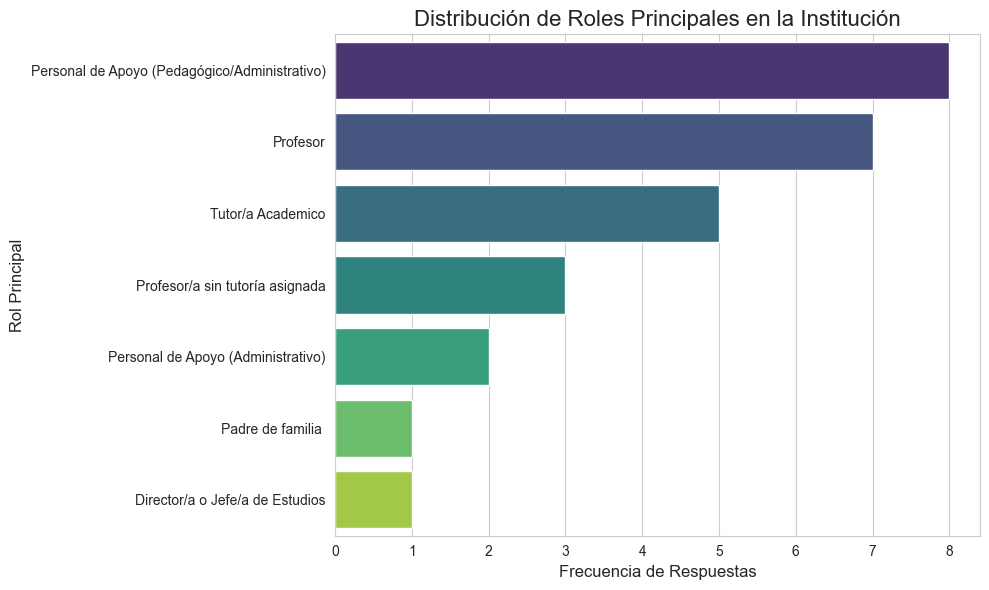

/tmp/ipykernel_7576/292994250.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='anios_experiencia', data=respuestas,
/tmp/ipykernel_7576/292994250.py:21: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(y='anios_experiencia', data=respuestas,


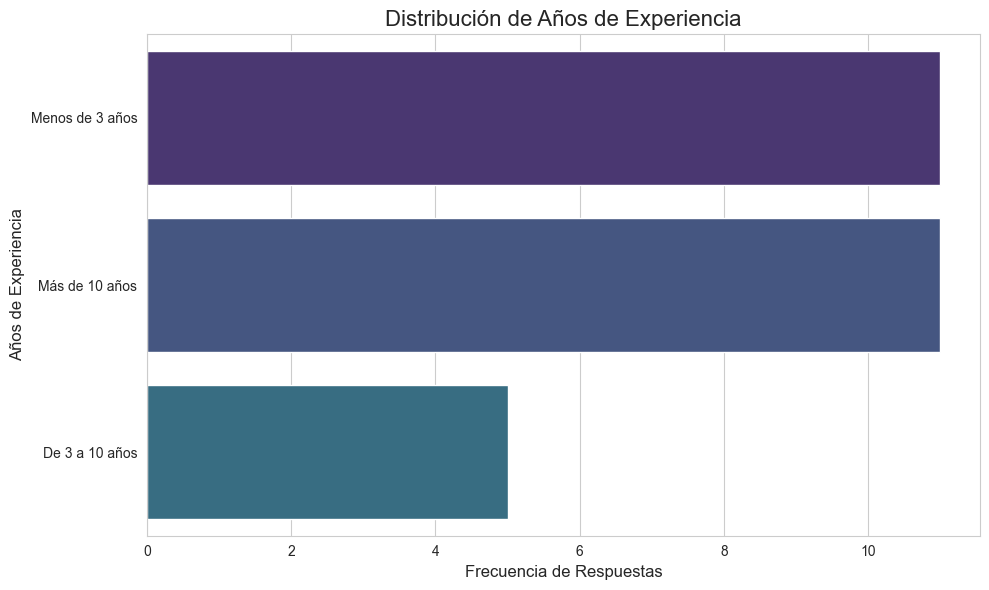

/tmp/ipykernel_7576/292994250.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='num_estudiantes_riesgo_semanal', data=respuestas,
/tmp/ipykernel_7576/292994250.py:32: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(y='num_estudiantes_riesgo_semanal', data=respuestas,


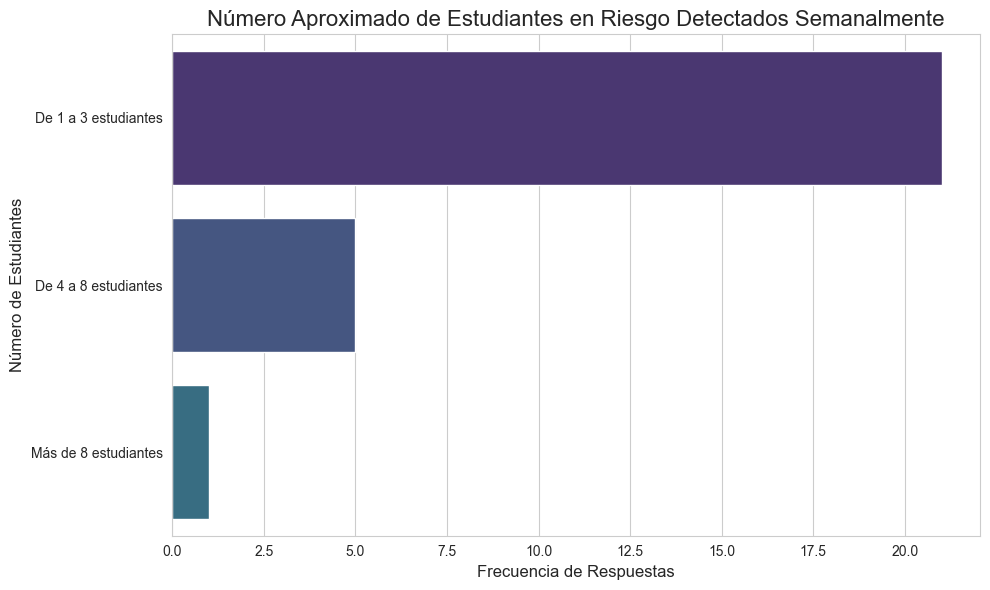

/tmp/ipykernel_7576/292994250.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='preferencia_notificacion_alerta', data=respuestas,
/tmp/ipykernel_7576/292994250.py:43: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(y='preferencia_notificacion_alerta', data=respuestas,


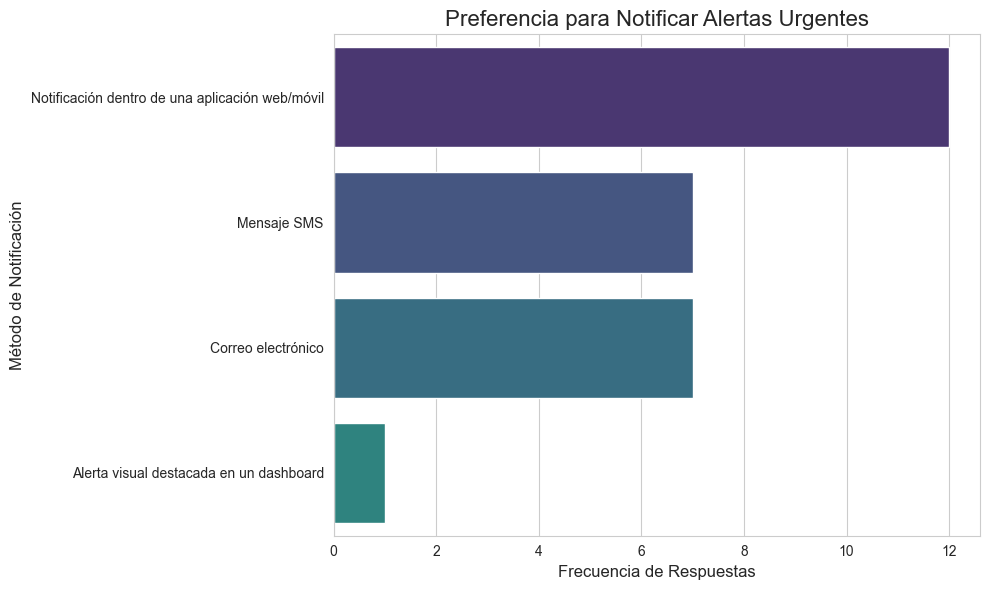

In [38]:
if respuestas is not None:
    print("\n--- 4.1. Distribución de Variables Categóricas Clave ---")
    
    # Definimos una paleta de colores para la consistencia visual en los gráficos
    # Se ajusta n_colors según el número máximo de categorías en tus gráficos.
    palette = sns.color_palette("viridis", n_colors=len(respuestas['rol_principal'].unique())) 

    # Gráfico 1: Distribución de Roles Principales en la Institución
    plt.figure(figsize=(10, 6))
    sns.countplot(y='rol_principal', data=respuestas, 
                  order=respuestas['rol_principal'].value_counts().index, # Ordena las barras de mayor a menor frecuencia
                  palette=palette) 
    plt.title('Distribución de Roles Principales en la Institución', fontsize=16)
    plt.xlabel('Frecuencia de Respuestas', fontsize=12)
    plt.ylabel('Rol Principal', fontsize=12)
    plt.tight_layout() 
    plt.show()

    # Gráfico 2: Distribución de Años de Experiencia
    plt.figure(figsize=(10, 6))
    sns.countplot(y='anios_experiencia', data=respuestas, 
                  order=respuestas['anios_experiencia'].value_counts().index, 
                  palette=palette) # Reutilizamos la paleta
    plt.title('Distribución de Años de Experiencia', fontsize=16)
    plt.xlabel('Frecuencia de Respuestas', fontsize=12)
    plt.ylabel('Años de Experiencia', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Gráfico 3: Número Aproximado de Estudiantes en Riesgo Detectados Semanalmente
    plt.figure(figsize=(10, 6))
    sns.countplot(y='num_estudiantes_riesgo_semanal', data=respuestas, 
                  order=respuestas['num_estudiantes_riesgo_semanal'].value_counts().index, 
                  palette=palette)
    plt.title('Número Aproximado de Estudiantes en Riesgo Detectados Semanalmente', fontsize=16)
    plt.xlabel('Frecuencia de Respuestas', fontsize=12)
    plt.ylabel('Número de Estudiantes', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Gráfico 4: Preferencia para Notificar Alertas Urgentes
    plt.figure(figsize=(10, 6))
    sns.countplot(y='preferencia_notificacion_alerta', data=respuestas, 
                  order=respuestas['preferencia_notificacion_alerta'].value_counts().index, 
                  palette=palette)
    plt.title('Preferencia para Notificar Alertas Urgentes', fontsize=16)
    plt.xlabel('Frecuencia de Respuestas', fontsize=12)
    plt.ylabel('Método de Notificación', fontsize=12)
    plt.tight_layout()
    plt.show()

**Distribución de Variables Numéricas Clave**


--- 4.2. Distribución de Variables Numéricas Clave (Escalas Likert) ---

Medias de las puntuaciones de las escalas Likert (ordenadas de mayor a menor):
probabilidad_recomendar                    4.78
importancia_explicacion_riesgo             4.48
utilidad_sistema_automatico                3.81
comodidad_herramientas_digitales           3.63
experiencia_con_sistemas                   3.58
conveniencia_herramientas_adicionales      3.42
frecuencia_uso_herramientas_adicionales    3.07
satisfaccion_herramientas_adicionales      3.04
facilidad_coordinacion                     3.04
experiencia_sistemas_seguimiento           3.00
dificultad_identificacion_riesgo           2.81
dtype: float64


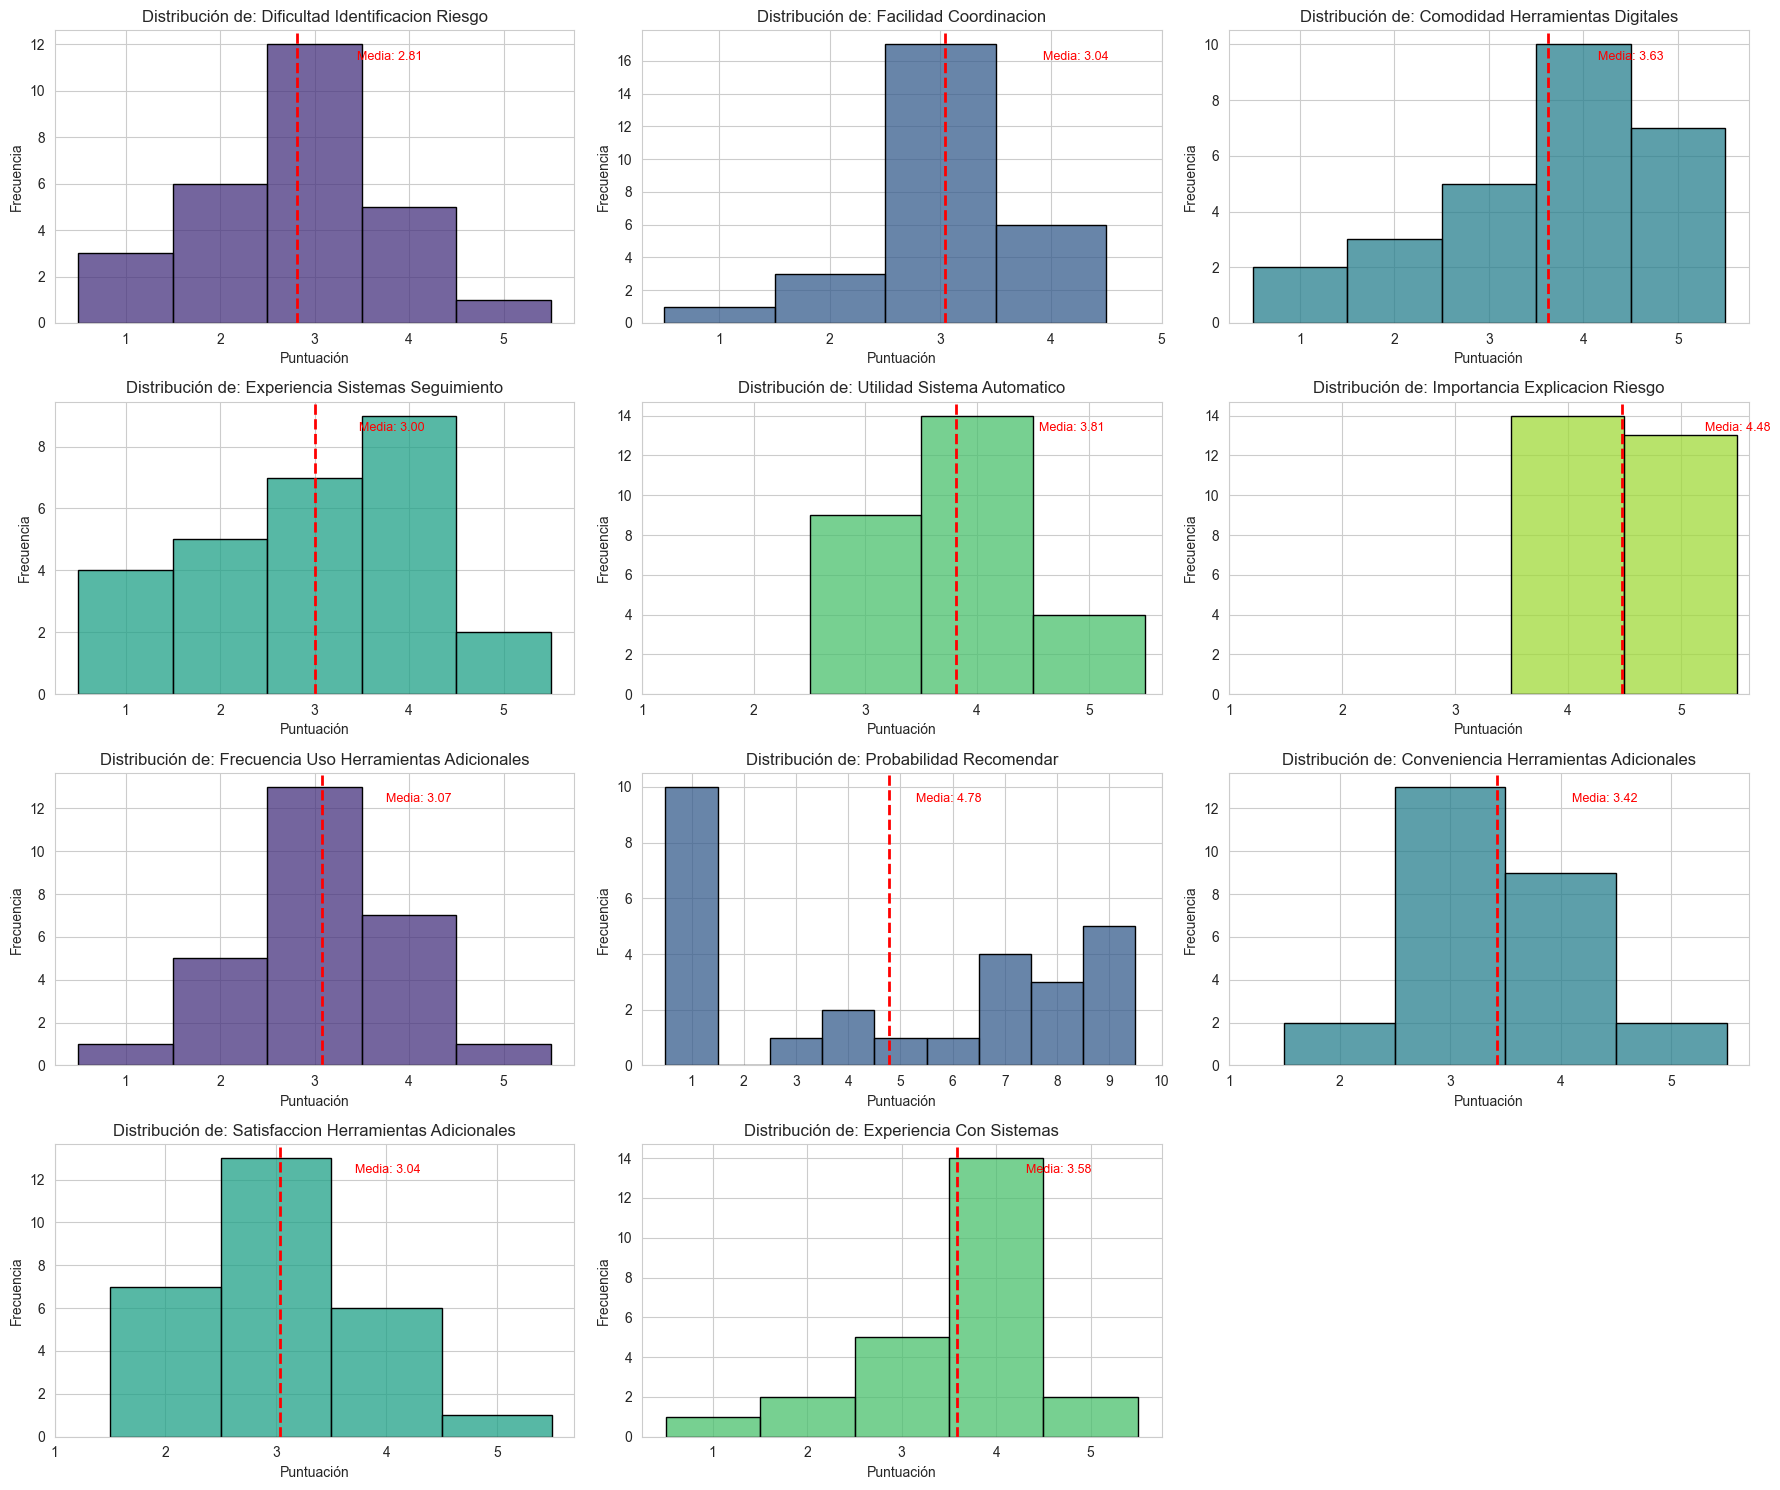

In [39]:
if respuestas is not None:
    print("\n--- 4.2. Distribución de Variables Numéricas Clave (Escalas Likert) ---")

    # Lista de todas las columnas de escala Likert ya convertidas a numéricas.
    numerical_likert_cols_for_plot = [
        "dificultad_identificacion_riesgo",
        "facilidad_coordinacion",
        "comodidad_herramientas_digitales",
        "experiencia_sistemas_seguimiento",
        "utilidad_sistema_automatico",
        "importancia_explicacion_riesgo",
        "frecuencia_uso_herramientas_adicionales",
        "probabilidad_recomendar", # Es escala 1-10
        "conveniencia_herramientas_adicionales", 
        "satisfaccion_herramientas_adicionales",
        "experiencia_con_sistemas"
    ]
    
    # Calcular las medias antes de graficar para mostrarlas en los histogramas
    # .mean() por defecto ignora los NaN, lo cual es el comportamiento deseado aquí.
    mean_scores = respuestas[numerical_likert_cols_for_plot].mean().sort_values(ascending=False)
    print("\nMedias de las puntuaciones de las escalas Likert (ordenadas de mayor a menor):")
    print(mean_scores.round(2)) # Redondear a 2 decimales para una mejor lectura

    plt.figure(figsize=(18, 15)) # Tamaño general de la figura para contener todos los subplots

    for i, col in enumerate(numerical_likert_cols_for_plot):
        ax = plt.subplot(4, 3, i + 1) # Define el subplot actual (filas, columnas, índice actual + 1)
        
        # Eliminar NaNs para el trazado del histograma para evitar errores y representar solo los datos existentes.
        data_to_plot = respuestas[col].dropna()

        # sns.histplot crea el histograma
        # bins ajustados para escalas Likert (cada bin representa un valor entero)
        # kde=False para no mostrar la estimación de densidad (línea suave)
        # edgecolor='black' para añadir bordes a las barras
        # color: seleccionamos un color de la paleta.
        sns.histplot(data_to_plot, 
                     bins=np.arange(data_to_plot.min()-0.5, data_to_plot.max()+1.5, 1), 
                     kde=False, 
                     edgecolor='black', 
                     ax=ax, 
                     color=sns.color_palette("viridis")[i % len(sns.color_palette("viridis"))]) # Color de la paleta

        plt.title(f'Distribución de: {col.replace("_", " ").title()}', fontsize=12) # Título limpio y legible
        plt.xlabel('Puntuación', fontsize=10)
        plt.ylabel('Frecuencia', fontsize=10)
        
        # Ajustar los ticks del eje X para que muestren valores enteros de la escala
        if col == "probabilidad_recomendar":
            plt.xticks(np.arange(1, 11)) # Para la escala 1-10
        else:
            plt.xticks(np.arange(1, 6)) # Para las escalas 1-5

        # Añadir una línea vertical para la media y su valor numérico en el gráfico
        mean_val = mean_scores[col]
        plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=2)
        min_ylim, max_ylim = plt.ylim() # Obtener los límites del eje Y para posicionar el texto
        plt.text(mean_val + (max_ylim * 0.05), max_ylim * 0.9, f'Media: {mean_val:.2f}', color='r', fontsize=9)

    plt.tight_layout() # Ajusta los subplots para evitar superposiciones de títulos/etiquetas
    plt.show()

**Factores de Dificultad para Identificar Estudiantes en Riesgo**


--- 5.1. Factores de Dificultad para Identificar Estudiantes en Riesgo ---


/tmp/ipykernel_7576/3011214772.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='rol_principal', x='dificultad_identificacion_riesgo', data=respuestas,


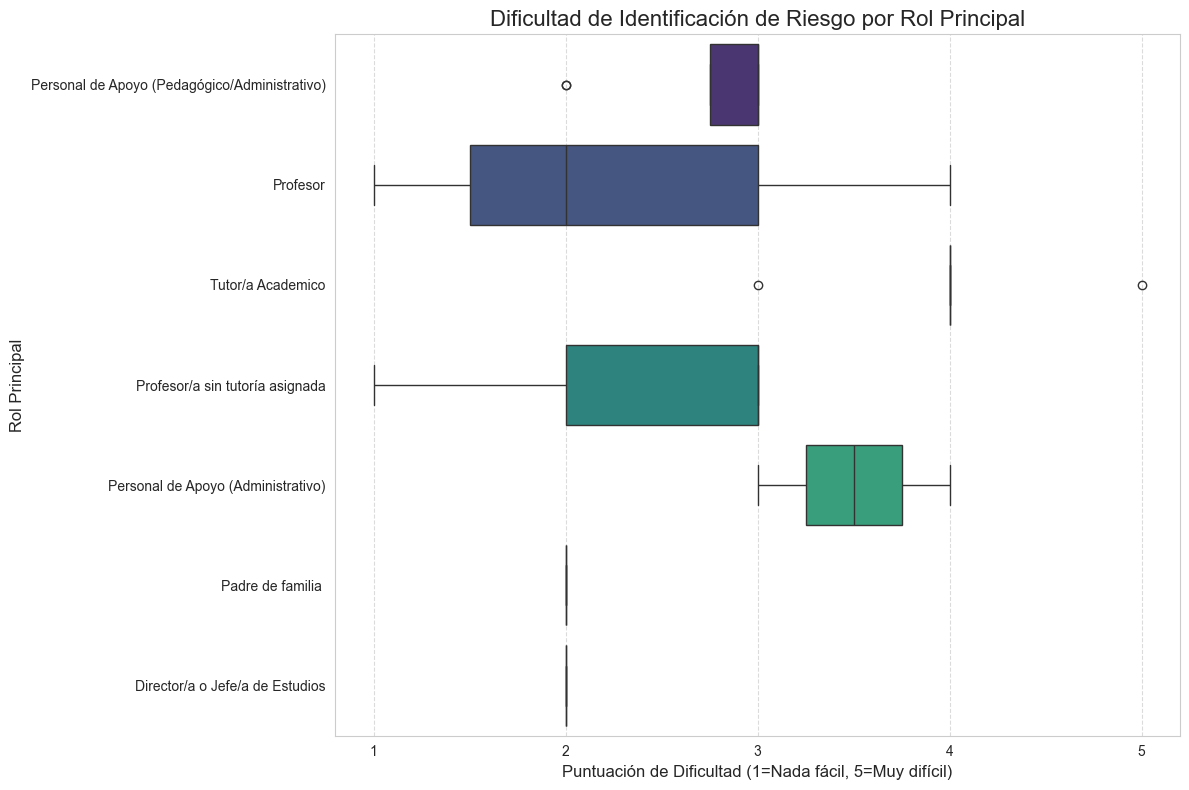

/tmp/ipykernel_7576/3011214772.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='anios_experiencia', x='dificultad_identificacion_riesgo', data=respuestas,
/tmp/ipykernel_7576/3011214772.py:23: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.boxplot(y='anios_experiencia', x='dificultad_identificacion_riesgo', data=respuestas,


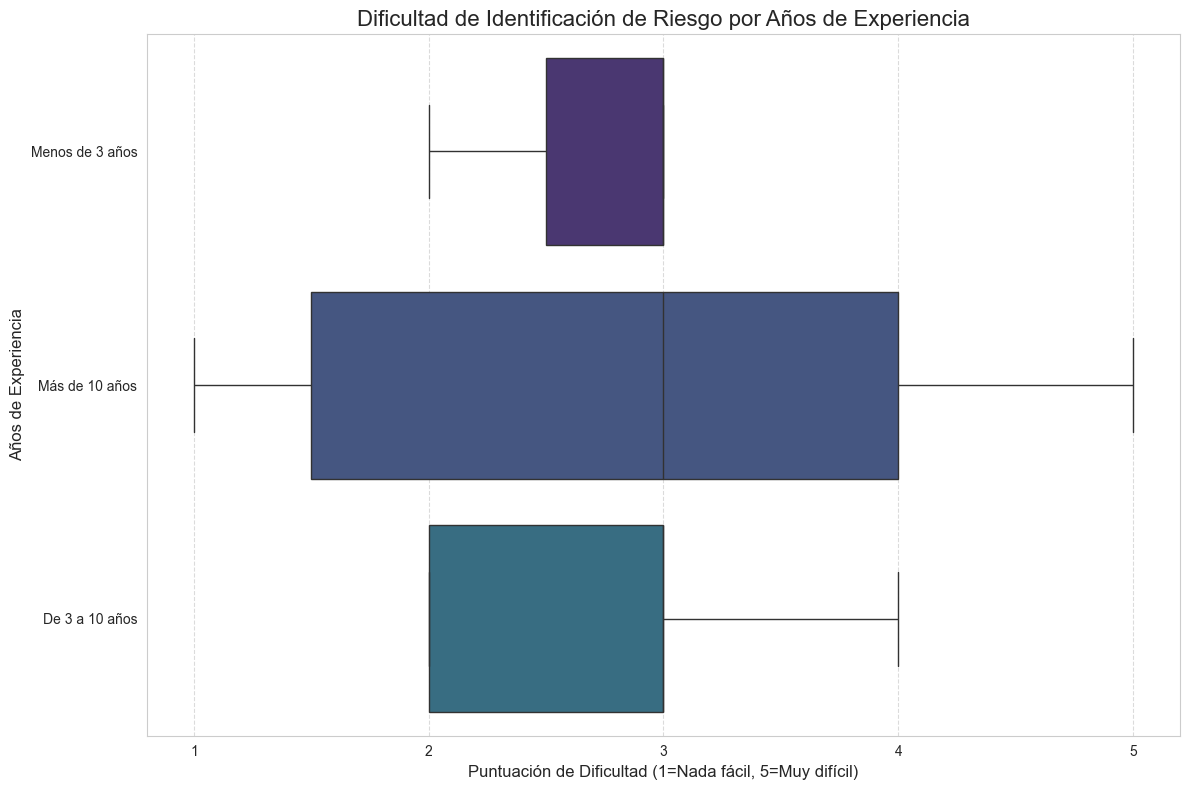

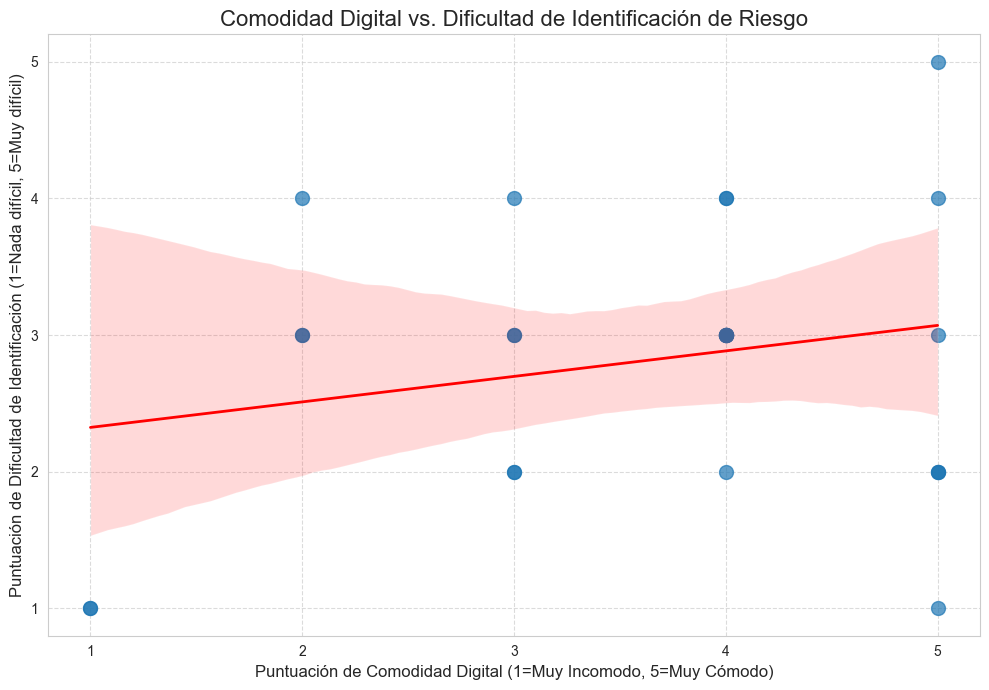


--- Correlación de 'dificultad_identificacion_riesgo' con otras variables numéricas ---
dificultad_identificacion_riesgo           1.00
experiencia_sistemas_seguimiento           0.38
facilidad_coordinacion                     0.34
comodidad_herramientas_digitales           0.23
frecuencia_uso_herramientas_adicionales    0.19
experiencia_con_sistemas                   0.15
probabilidad_recomendar                    0.14
conveniencia_herramientas_adicionales     -0.02
utilidad_sistema_automatico               -0.16
importancia_explicacion_riesgo            -0.20
satisfaccion_herramientas_adicionales     -0.23
Name: dificultad_identificacion_riesgo, dtype: float64


In [40]:
if respuestas is not None:
    print("\n--- 5.1. Factores de Dificultad para Identificar Estudiantes en Riesgo ---")
    
    # Definimos la paleta para consistencia visual
    palette = sns.color_palette("viridis", n_colors=len(respuestas['rol_principal'].unique())) 

    # --- Gráfico 1: Dificultad por Rol Principal ---
    # Un boxplot es ideal para mostrar la distribución (mediana, cuartiles, valores atípicos) 
    # de una variable numérica (dificultad) a través de las categorías de una variable categórica (rol principal).
    plt.figure(figsize=(12, 8))
    sns.boxplot(y='rol_principal', x='dificultad_identificacion_riesgo', data=respuestas, 
                order=respuestas['rol_principal'].value_counts().index, palette=palette)
    plt.title('Dificultad de Identificación de Riesgo por Rol Principal', fontsize=16)
    plt.xlabel('Puntuación de Dificultad (1=Nada fácil, 5=Muy difícil)', fontsize=12)
    plt.ylabel('Rol Principal', fontsize=12)
    plt.xticks(np.arange(1, 6)) # Asegurar que los ticks del eje X muestren los valores de la escala 1-5
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Cuadrícula para el eje X
    plt.tight_layout()
    plt.show()

    # --- Gráfico 2: Dificultad por Años de Experiencia ---
    plt.figure(figsize=(12, 8))
    sns.boxplot(y='anios_experiencia', x='dificultad_identificacion_riesgo', data=respuestas,
                order=respuestas['anios_experiencia'].value_counts().index, palette=palette)
    plt.title('Dificultad de Identificación de Riesgo por Años de Experiencia', fontsize=16)
    plt.xlabel('Puntuación de Dificultad (1=Nada fácil, 5=Muy difícil)', fontsize=12)
    plt.ylabel('Años de Experiencia', fontsize=12)
    plt.xticks(np.arange(1, 6))
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- Gráfico 3: Comodidad Digital vs. Dificultad (con regresión lineal) ---
    # Un regplot muestra la dispersión de los puntos y traza una línea de regresión lineal,
    # útil para visualizar tendencias entre dos variables numéricas. Permite ver si hay una relación.
    plt.figure(figsize=(10, 7))
    sns.regplot(x='comodidad_herramientas_digitales', y='dificultad_identificacion_riesgo', data=respuestas, 
                scatter_kws={'alpha':0.7, 's':100}, # Configuración de los puntos (transparencia, tamaño)
                line_kws={'color':'red', 'linewidth':2}) # Configuración de la línea de regresión
    plt.title('Comodidad Digital vs. Dificultad de Identificación de Riesgo', fontsize=16)
    plt.xlabel('Puntuación de Comodidad Digital (1=Muy Incomodo, 5=Muy Cómodo)', fontsize=12)
    plt.ylabel('Puntuación de Dificultad de Identificación (1=Nada difícil, 5=Muy difícil)', fontsize=12)
    plt.xticks(np.arange(1, 6))
    plt.yticks(np.arange(1, 6))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # --- Análisis de Correlación Numérica ---
    # Calculamos la matriz de correlación solo para las columnas numéricas.
    # .corr(numeric_only=True) asegura que solo se consideren tipos de datos numéricos y se excluyan los NaNs.
    correlation_matrix = respuestas.corr(numeric_only=True)
    
    print("\n--- Correlación de 'dificultad_identificacion_riesgo' con otras variables numéricas ---")
    # Imprimir las correlaciones de la columna 'dificultad_identificacion_riesgo' 
    # con todas las demás variables numéricas, ordenadas de mayor a menor fuerza de correlación.
    print(correlation_matrix['dificultad_identificacion_riesgo'].sort_values(ascending=False).round(2))

**Segmentación del Personal**


--- 5.2. Segmentación del Personal ---


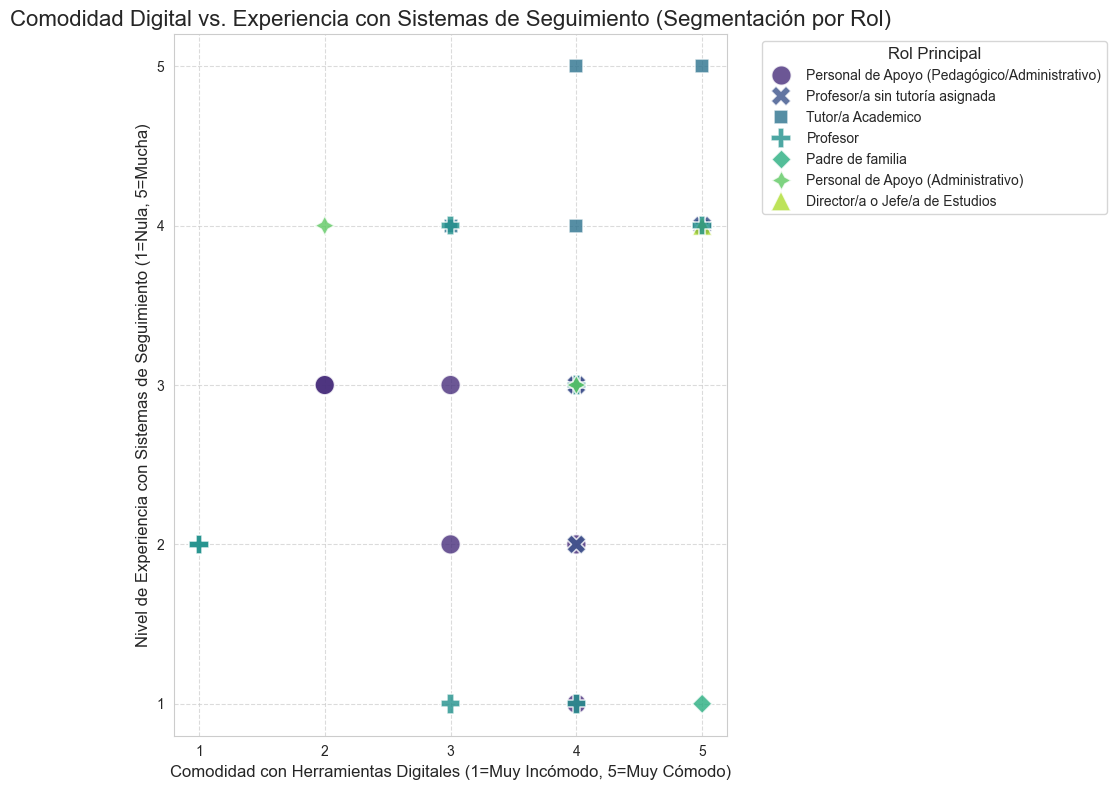


--- 5.2. Promedios de Percepciones Clave por Rol Principal (Caracterización de Segmentos) ---
                                               comodidad_digital_mean  experiencia_sistemas_mean  dificultad_identificacion_mean  utilidad_sistema_alerta_mean  probabilidad_recomendar_mean  frecuencia_uso_adic_mean  conveniencia_adic_mean  satisfaccion_adic_mean
rol_principal                                                                                                                                                                                                                                                         
Padre de familia                                                 5.00                       1.00                            2.00                          5.00                          7.00                      3.00                    5.00                    4.00
Profesor/a sin tutoría asignada                                  4.33                       3.00                    

In [41]:
if respuestas is not None:
    print("\n--- 5.2. Segmentación del Personal ---")

    # --- Gráfico de Dispersión: Comodidad Digital vs. Nivel de Experiencia (segmentado por Rol) ---
    # Este scatter plot nos permite visualizar clústeres de usuarios basados en dos dimensiones clave:
    # la comodidad con herramientas digitales y el nivel de experiencia con sistemas de seguimiento.
    # El color y el estilo del punto según el 'rol_principal' ayudan a entender qué perfiles de usuario 
    # pertenecen a estos grupos, ofreciendo una segmentación visual.
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='comodidad_herramientas_digitales', y='experiencia_sistemas_seguimiento',
                    hue='rol_principal', data=respuestas,
                    s=200, alpha=0.8,
                    palette='viridis', style='rol_principal')

    plt.title('Comodidad Digital vs. Experiencia con Sistemas de Seguimiento (Segmentación por Rol)', fontsize=16)
    plt.xlabel('Comodidad con Herramientas Digitales (1=Muy Incómodo, 5=Muy Cómodo)', fontsize=12)
    plt.ylabel('Nivel de Experiencia con Sistemas de Seguimiento (1=Nula, 5=Mucha)', fontsize=12)
    plt.xticks(np.arange(1, 6))
    plt.yticks(np.arange(1, 6))
    plt.legend(title='Rol Principal', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

    # --- Promedios de variables clave por Rol Principal ---
    avg_per_role = respuestas.groupby('rol_principal').agg(
        comodidad_digital_mean=('comodidad_herramientas_digitales', 'mean'),
        experiencia_sistemas_mean=('experiencia_sistemas_seguimiento', 'mean'),
        dificultad_identificacion_mean=('dificultad_identificacion_riesgo', 'mean'),
        utilidad_sistema_alerta_mean=('utilidad_sistema_automatico', 'mean'),
        probabilidad_recomendar_mean=('probabilidad_recomendar', 'mean'),
        frecuencia_uso_adic_mean=('frecuencia_uso_herramientas_adicionales', 'mean'),
        conveniencia_adic_mean=('conveniencia_herramientas_adicionales', 'mean'),
        satisfaccion_adic_mean=('satisfaccion_herramientas_adicionales', 'mean')
    ).sort_values(by='utilidad_sistema_alerta_mean', ascending=False)

    print("\n--- 5.2. Promedios de Percepciones Clave por Rol Principal (Caracterización de Segmentos) ---")
    print(avg_per_role.round(2))

    # --- Promedios de variables clave por Años de Experiencia ---
    avg_per_experience = respuestas.groupby('anios_experiencia').agg(
        comodidad_digital_mean=('comodidad_herramientas_digitales', 'mean'),
        experiencia_sistemas_mean=('experiencia_sistemas_seguimiento', 'mean'),
        dificultad_identificacion_mean=('dificultad_identificacion_riesgo', 'mean'),
        utilidad_sistema_alerta_mean=('utilidad_sistema_automatico', 'mean'),
        probabilidad_recomendar_mean=('probabilidad_recomendar', 'mean'),
        frecuencia_uso_adic_mean=('frecuencia_uso_herramientas_adicionales', 'mean'),
        conveniencia_adic_mean=('conveniencia_herramientas_adicionales', 'mean'),
        satisfaccion_adic_mean=('satisfaccion_herramientas_adicionales', 'mean')
    ).sort_values(by='dificultad_identificacion_mean', ascending=False)

    print("\n--- 5.2. Promedios de Percepciones Clave por Años de Experiencia (Otra Capa de Segmentación) ---")
    print(avg_per_experience.round(2))

**Interacciones entre Preferencias de Notificación y Preocupaciones**


--- Interacciones entre Preferencias de Notificación y Preocupaciones ---

--- Matriz de Co-ocurrencia: Preocupaciones vs. Preferencias de Notificación ---
                                                    Alerta visual destacada en un dashboard  Correo electrónico  Mensaje SMS  Notificación dentro de una aplicación web/móvil
El coste de la herramienta para el instituto.                                             0                   2            1                                                2
El posible aumento de la carga de trabajo del p...                                        1                   1            1                                                3
El posible uso inadecuado o la mala interpretac...                                        0                   2            2                                                5
Falta de claridad sobre cómo actuar después de ...                                        0                   0            1                       

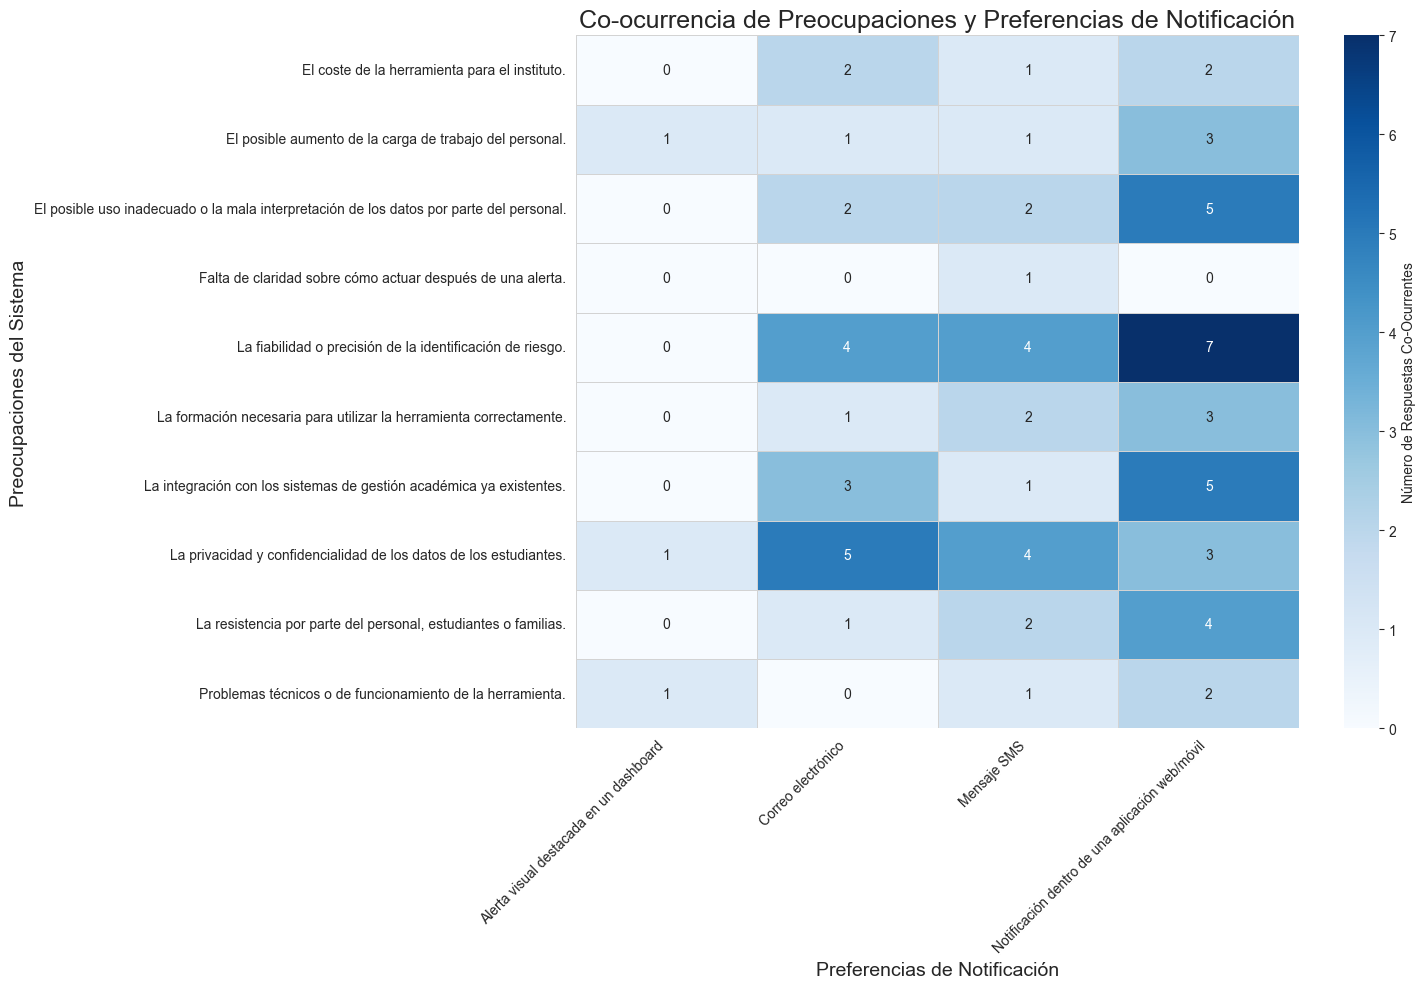

In [42]:
if respuestas is not None:
    print("\n--- Interacciones entre Preferencias de Notificación y Preocupaciones ---")

    # Paso 1: Crear columnas dummy (binarias) para cada opción de preocupación y de notificación.
    # get_dummies transforma cada opción en una columna binaria (0 o 1).
    # .add_prefix('Prefijo_') añade un prefijo a los nuevos nombres de columna para distinguirlos claramente.
    # str.strip() para asegurar que también se limpian los nombres de las columnas resultantes.
    df_preocupaciones_dummies = respuestas['preocupaciones_sistema_alerta'].str.get_dummies(sep=';').add_prefix('Preoc_')
    # Se añade un paso .str.strip() a las columnas de preocupación DUMMY para asegurar limpieza
    df_preocupaciones_dummies.columns = df_preocupaciones_dummies.columns.str.strip() 

    df_notificaciones_dummies = respuestas['preferencia_notificacion_alerta'].str.get_dummies(sep=';').add_prefix('Notif_')
    df_notificaciones_dummies.columns = df_notificaciones_dummies.columns.str.strip()


    # Paso 2: Unir las columnas dummy creadas.
    # concat() se usa para unir DataFrames. axis=1 significa unir por columnas.
    df_merged_dummies = pd.concat([df_preocupaciones_dummies, df_notificaciones_dummies], axis=1)

    # Identificar todas las columnas dummy creadas para preocupaciones y notificaciones
    # .filter(like='Prefijo_') permite seleccionar columnas que empiezan con el prefijo dado de manera eficiente.
    concerns_cols = df_merged_dummies.filter(like='Preoc_').columns.tolist()
    notif_cols = df_merged_dummies.filter(like='Notif_').columns.tolist()

    # Paso 3: Calcular la matriz de co-ocurrencia.
    # Esto se logra multiplicando la transpuesta de la sub-matriz de preocupaciones 
    # por la sub-matriz de notificaciones. El producto matricial (@) suma las veces
    # que una preocupación 'i' y una preferencia de notificación 'j' fueron seleccionadas juntas en la misma respuesta.
    co_occurrence_matrix_notif_preoc = df_merged_dummies[concerns_cols].T @ df_merged_dummies[notif_cols]

    print("\n--- Matriz de Co-ocurrencia: Preocupaciones vs. Preferencias de Notificación ---")
    # Limpiamos los nombres de las columnas e índices de la matriz para una mejor presentación
    co_occurrence_matrix_notif_preoc.columns = [col.replace('Notif_', '').strip() for col in co_occurrence_matrix_notif_preoc.columns]
    co_occurrence_matrix_notif_preoc.index = [col.replace('Preoc_', '').strip() for col in co_occurrence_matrix_notif_preoc.index]
    print(co_occurrence_matrix_notif_preoc.astype(int))

    # --- Visualización del Heatmap ---
    # Un heatmap es excelente para visualizar la fuerza de las co-ocurrencias.
    # annot=True muestra los valores numéricos en las celdas.
    # cmap='Blues' usa un gradiente de color azul para mostrar la intensidad.
    # fmt='d' formatea los números como enteros.
    # linewidths y linecolor añaden líneas para delimitar las celdas, mejorando la legibilidad.
    plt.figure(figsize=(15, 10)) # Tamaño del gráfico para que sea legible
    sns.heatmap(co_occurrence_matrix_notif_preoc.astype(int), annot=True, cmap='Blues', fmt='d', linewidths=.5, linecolor='lightgrey',
                cbar_kws={'label': 'Número de Respuestas Co-Ocurrentes'}) # Barra de color con etiqueta
    plt.title('Co-ocurrencia de Preocupaciones y Preferencias de Notificación', fontsize=18)
    plt.xlabel('Preferencias de Notificación', fontsize=14)
    plt.ylabel('Preocupaciones del Sistema', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para evitar solapamiento y mejorar lectura
    plt.yticks(rotation=0, fontsize=10) # No rotar etiquetas del eje Y
    plt.tight_layout() # Ajustar el layout para evitar cortes
    plt.show()

**Tipos de Datos Importantes vs. Acciones de Registro/Reportes Deseadas**


---Tipos de Datos Importantes vs. Acciones de Registro/Reportes Deseadas ---

---Matriz de Co-ocurrencia: Tipos de Datos de Riesgo y Acciones de Registro ---
                                                Acciones de apoyo implementadas (ej. tutoría extra, derivación)  Archivos adjuntos (ej. informes)  Coordinación con otros profesionales involucrados  Fecha y tipo de contacto con el estudiante/familia  No necesito registrar mis intervenciones en la app  Resultados o evolución observada tras la intervención  Resumen de la conversación/situación
Asistencia y absentismo (falta no justificada)                                                 19                                               1                                                  6                                                 13                                                   0                                                  15                                         9
Calificaciones académicas                            

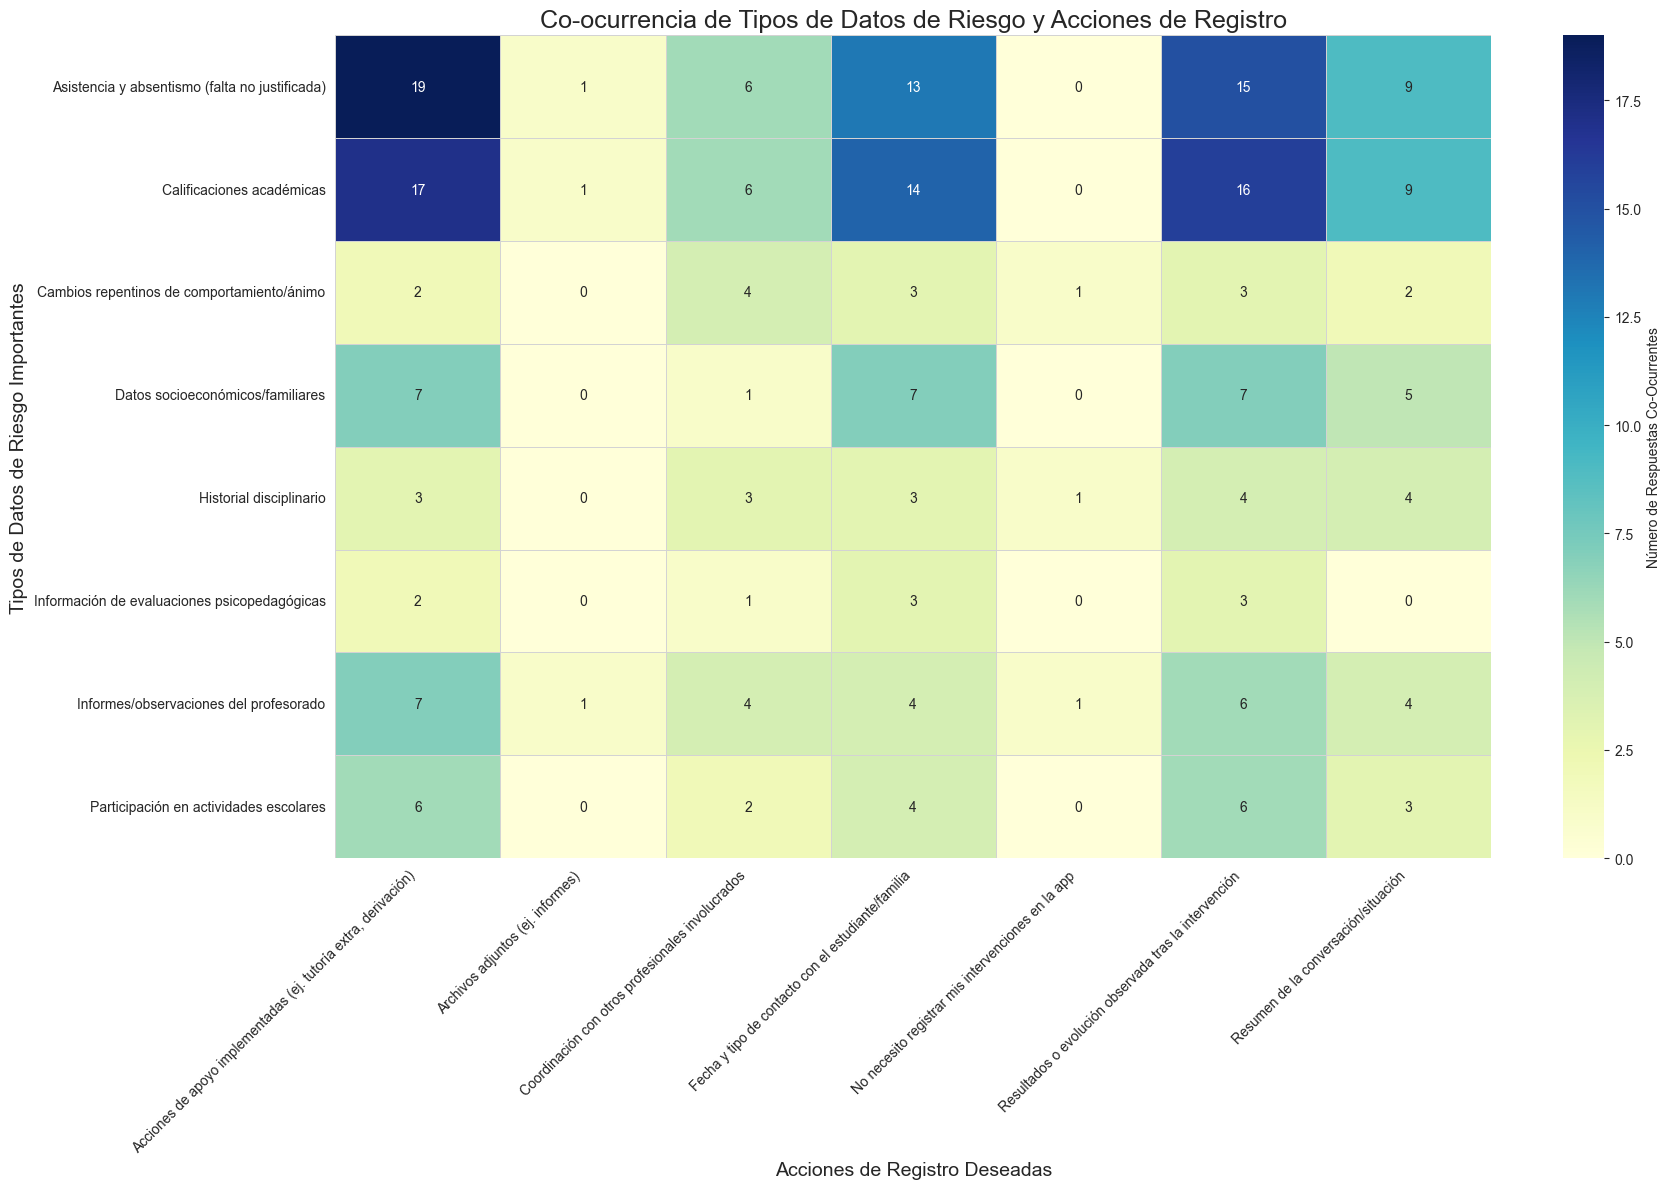


---Matriz de Co-ocurrencia: Tipos de Datos de Riesgo y Tipos de Reportes Valiosos ---
                                                Estadísticas agregadas del centro (ej. % de estudiantes en riesgo por curso)  Estudiantes con factores de riesgo específicos (ej. solo por absentismo)  Estudiantes con mayor incremento de riesgo reciente  Historial de riesgo individual por estudiante  Lista de estudiantes por nivel de riesgo (Alto, Medio, Bajo)  Reportes de intervenciones realizadas y sus resultados (agregado o individual)
Asistencia y absentismo (falta no justificada)                                                  4                                                                             6                                                                         5                                                7                                                 17                                                             3                             
Calificaciones académicas      

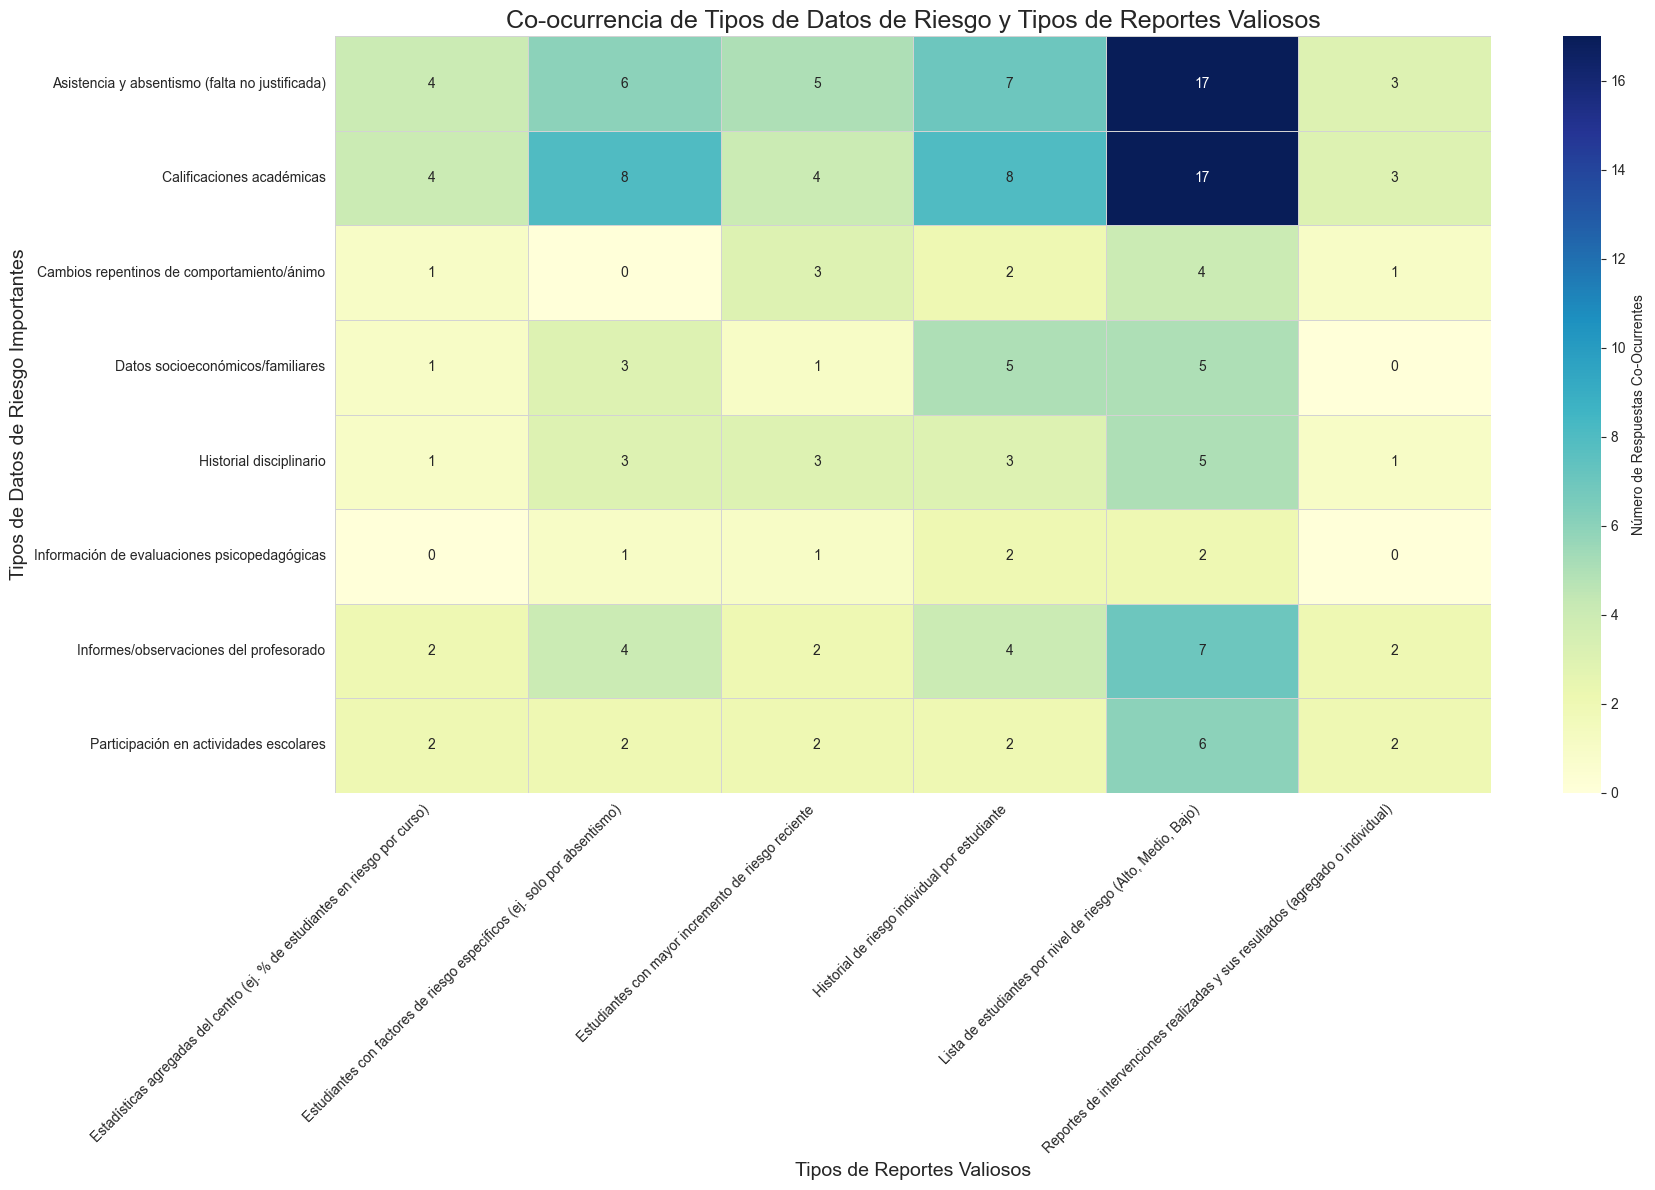

In [43]:
if respuestas is not None:
    print("\n---Tipos de Datos Importantes vs. Acciones de Registro/Reportes Deseadas ---")

    # Paso 1: Crear columnas dummy para cada opción en las columnas de selección múltiple relevantes.
    # add_prefix asegura que las columnas dummy tengan un prefijo que indique su origen.
    # Aplicamos .str.strip() a las columnas resultantes de get_dummies para asegurar limpieza.
    df_datos_dummies = respuestas['tipos_datos_importantes'].str.get_dummies(sep=';').add_prefix('Dato_')
    df_datos_dummies.columns = df_datos_dummies.columns.str.strip()

    df_acciones_dummies = respuestas['acciones_importantes_registro'].str.get_dummies(sep=';').add_prefix('Accion_')
    df_acciones_dummies.columns = df_acciones_dummies.columns.str.strip()

    df_reportes_dummies = respuestas['tipo_reportes_valiosos'].str.get_dummies(sep=';').add_prefix('Reporte_')
    df_reportes_dummies.columns = df_reportes_dummies.columns.str.strip()

    # Concatenar todos los DataFrames dummy para facilitar las operaciones de co-ocurrencia en un solo lugar.
    df_combined_dummies_analysis = pd.concat([df_datos_dummies, df_acciones_dummies, df_reportes_dummies], axis=1)

    # Identificar todas las columnas dummy creadas para cada categoría utilizando el prefijo.
    datos_cols = df_combined_dummies_analysis.filter(like='Dato_').columns.tolist()
    acciones_cols = df_combined_dummies_analysis.filter(like='Accion_').columns.tolist()
    reportes_cols = df_combined_dummies_analysis.filter(like='Reporte_').columns.tolist()

    # --- 5.4.1. Matriz de Co-ocurrencia: Tipos de Datos de Riesgo y Acciones de Registro ---
    # Multiplicamos la transpuesta de la sub-matriz de datos por la sub-matriz de acciones.
    # El resultado indica la frecuencia con la que un tipo de dato y una acción de registro fueron seleccionados juntos.
    co_occurrence_datos_acciones = df_combined_dummies_analysis[datos_cols].T @ df_combined_dummies_analysis[acciones_cols]

    print("\n---Matriz de Co-ocurrencia: Tipos de Datos de Riesgo y Acciones de Registro ---")
    # Limpiar los nombres de columnas e índices para una mejor presentación en la consola y el gráfico.
    # Se reemplaza el prefijo y se eliminan espacios extra.
    co_occurrence_datos_acciones.columns = [col.replace('Accion_', '').strip() for col in co_occurrence_datos_acciones.columns]
    co_occurrence_datos_acciones.index = [col.replace('Dato_', '').strip() for col in co_occurrence_datos_acciones.index]
    print(co_occurrence_datos_acciones.astype(int))

    # --- Visualización del Heatmap para Datos vs. Acciones ---
    plt.figure(figsize=(18, 12)) # Tamaño de la figura
    sns.heatmap(co_occurrence_datos_acciones.astype(int), annot=True, cmap='YlGnBu', fmt='d', linewidths=.5, linecolor='lightgrey',
                cbar_kws={'label': 'Número de Respuestas Co-Ocurrentes'})
    plt.title('Co-ocurrencia de Tipos de Datos de Riesgo y Acciones de Registro', fontsize=18)
    plt.xlabel('Acciones de Registro Deseadas', fontsize=14)
    plt.ylabel('Tipos de Datos de Riesgo Importantes', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

    # --- 5.4.2. Matriz de Co-ocurrencia: Tipos de Datos de Riesgo y Tipos de Reportes ---
    # Similar al anterior, pero cruzando datos importantes con tipos de reportes valiosos.
    co_occurrence_datos_reportes = df_combined_dummies_analysis[datos_cols].T @ df_combined_dummies_analysis[reportes_cols]

    print("\n---Matriz de Co-ocurrencia: Tipos de Datos de Riesgo y Tipos de Reportes Valiosos ---")
    # Limpiar nombres para mostrar.
    co_occurrence_datos_reportes.columns = [col.replace('Reporte_', '').strip() for col in co_occurrence_datos_reportes.columns]
    co_occurrence_datos_reportes.index = [col.replace('Dato_', '').strip() for col in co_occurrence_datos_reportes.index]
    print(co_occurrence_datos_reportes.astype(int))

    # --- Visualización del Heatmap para Datos vs. Reportes ---
    plt.figure(figsize=(18, 12))
    sns.heatmap(co_occurrence_datos_reportes.astype(int), annot=True, cmap='YlGnBu', fmt='d', linewidths=.5, linecolor='lightgrey',
                cbar_kws={'label': 'Número de Respuestas Co-Ocurrentes'})
    plt.title('Co-ocurrencia de Tipos de Datos de Riesgo y Tipos de Reportes Valiosos', fontsize=18)
    plt.xlabel('Tipos de Reportes Valiosos', fontsize=14)
    plt.ylabel('Tipos de Datos de Riesgo Importantes', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()